<a href="https://colab.research.google.com/github/feomedeirosdev/ml-courseira/blob/main/006_random_forerst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CursoIA/3.Algoritmos de Machine Learning/insurance.csv', keep_default_na=False)
df

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [ ]:
target = 'Accident'
features = list(df.drop(columns=['Unnamed: 0', target]).columns)

y = df[target]
X = df[features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.3,
  random_state=42
)

In [ ]:
for col in X_train.columns:
  if X_train[col].dtype == 'object':
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

for col in X_test.columns:
  if X_test[col].dtype == 'object':
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col])

In [ ]:
rfc = RandomForestClassifier(
  n_estimators=500,
  max_depth=20,
  max_leaf_nodes=12,
)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=12, n_estimators=500)

In [ ]:
rfc_predict = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_predict)
rfc_precision = precision_score(y_test, rfc_predict, average='weighted')
rfc_recall = recall_score(y_test, rfc_predict, average='weighted')
rfc_f1 = f1_score(y_test, rfc_predict, average='weighted')
rfc_cm = confusion_matrix(y_test, rfc_predict)

print(rfc_cm)
print()
print(f'Accuracy: {rfc_accuracy*100:.2f}%')
print(f'Precision: {rfc_precision*100:.2f}%')
print(f'Recall: {rfc_recall*100:.2f}%')
print(f'F1: {rfc_f1*100:.2f}%')
print()
print(classification_report(y_test, rfc_predict))

[[ 352   62  102    1]
 [  50  330    5   91]
 [   0    0 4298    0]
 [   0   52    4  653]]

Accuracy: 93.88%
Precision: 93.63%
Recall: 93.88%
F1: 93.63%

              precision    recall  f1-score   support

        Mild       0.88      0.68      0.77       517
    Moderate       0.74      0.69      0.72       476
        None       0.97      1.00      0.99      4298
      Severe       0.88      0.92      0.90       709

    accuracy                           0.94      6000
   macro avg       0.87      0.82      0.84      6000
weighted avg       0.94      0.94      0.94      6000



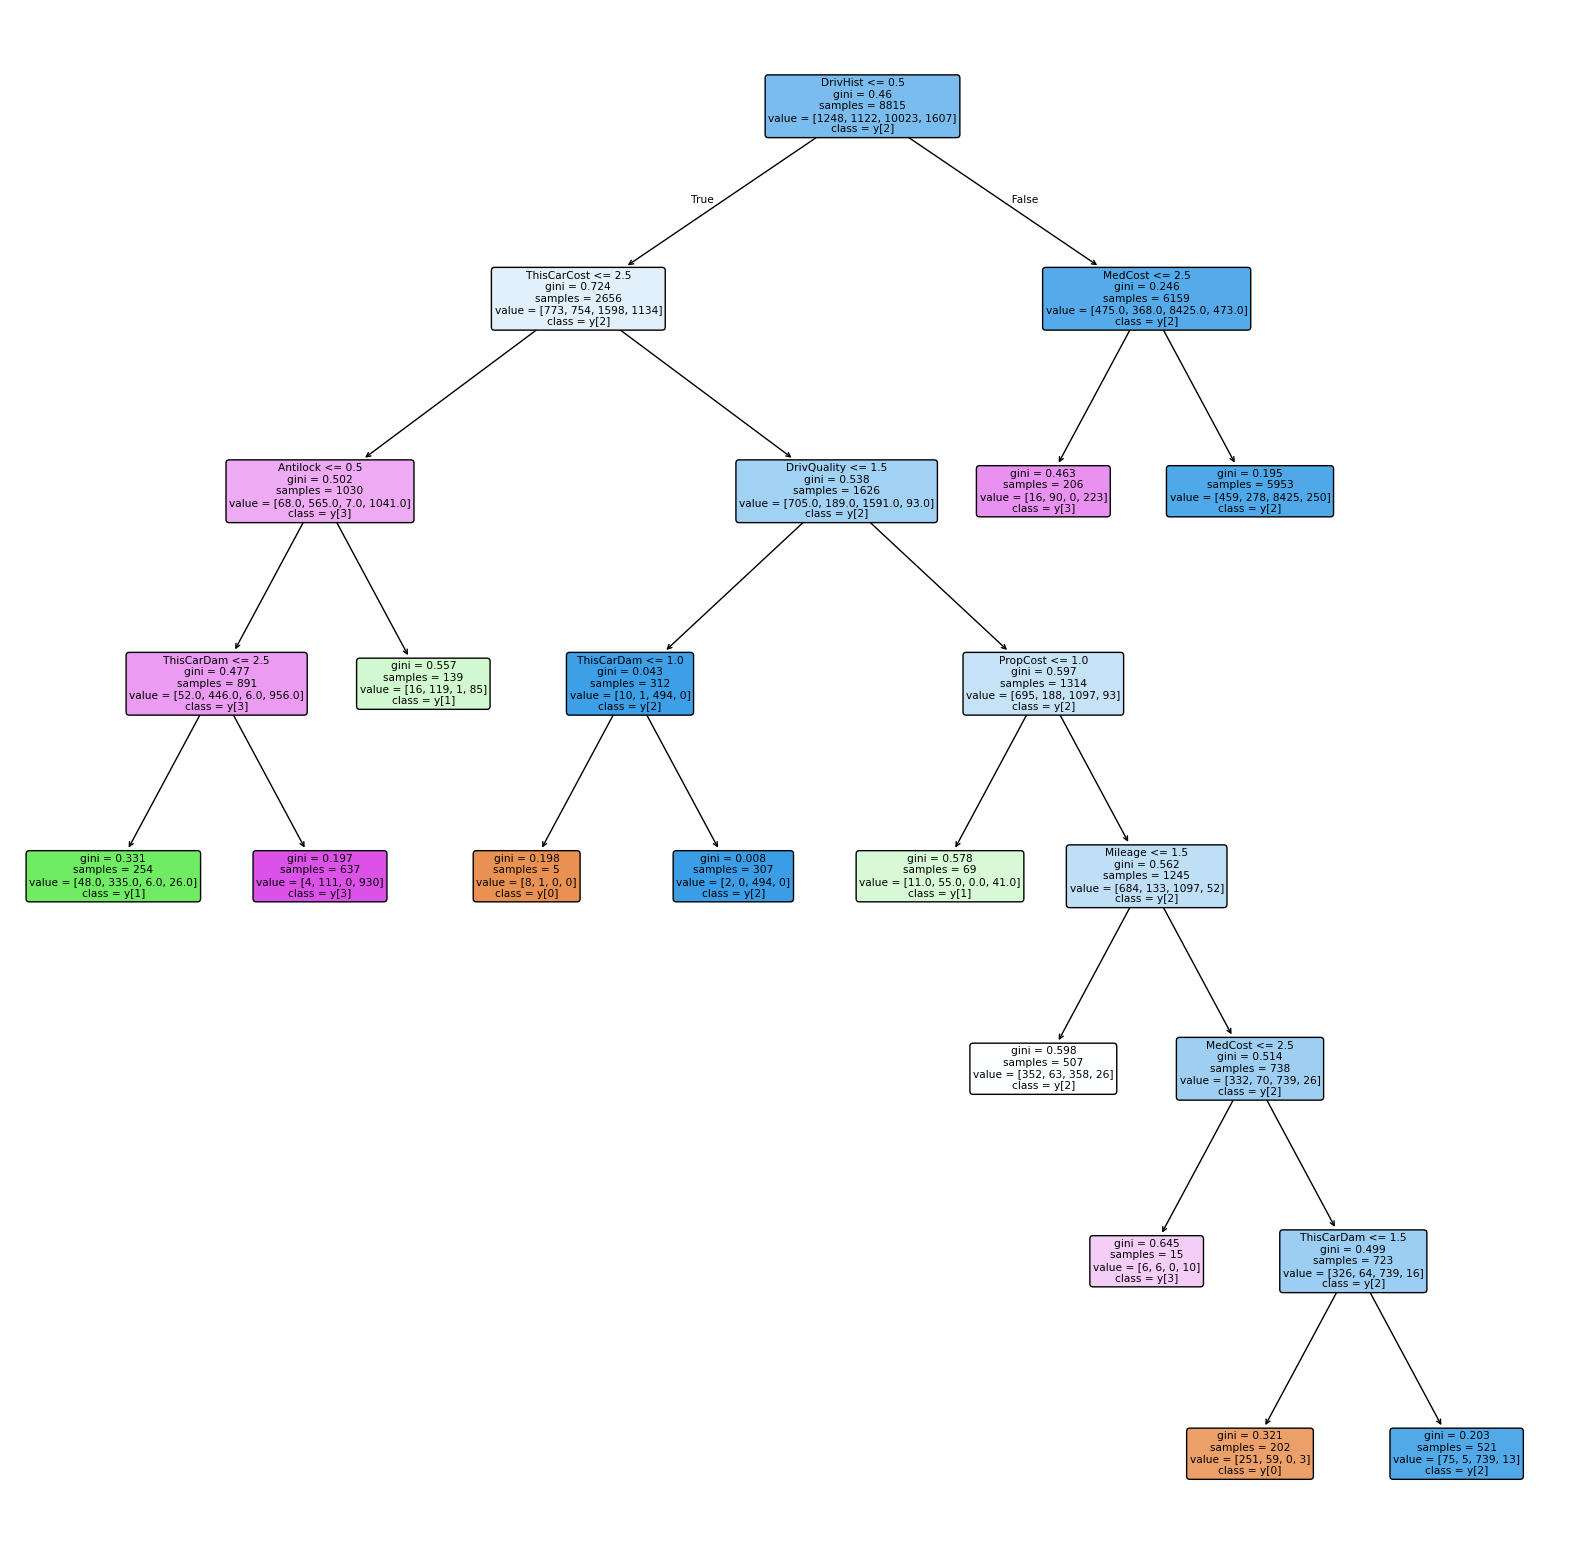

In [ ]:
tree_index = 0
tree_to_visualize = rfc.estimators_[tree_index]
plt.figure(figsize=(20,20))
plot_tree(tree_to_visualize, filled=True, feature_names=features, class_names=True, rounded=True)
plt.show()